In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from src.ml_statistical_features import load_data_as_dataframe
from src.data_preparation import Data

In [2]:
def print_informative_stats(data):
    print("Informativ nach informative_ce: ", str(len(data[data['informative_ce']])))
    print("Nicht informativ nach informative_ce: ", str(len(data) - len(data[data['informative_ce']])))

    print("Informativ nach informative_hr: ", str(len(data[data['informative_hr']])))
    print("Nicht informativ nach informative_hr: ", str(len(data) - len(data[data['informative_hr']])))

    both_informative = [hr and ce for hr, ce in zip(data['informative_hr'], data['informative_ce'])]
    print("Informativ nach beiden: ", str(len(data[both_informative])))

    only_hr_informative = [hr and not ce for hr, ce in zip(data['informative_hr'], data['informative_ce'])]
    print("Informativ nur nach informative_hr: ", str(len(data[only_hr_informative])))

In [3]:
def print_hr_stats(data):
    print("Durchschnittliche Herzrate nach BKG: ", data['bcg_hr'].median())
    
    inf_data = data[data['informative_hr']]
    print("Durchschnittliche Herzrate nach BKG bei informativen Segmenten: ", inf_data['bcg_hr'].mean())
    print("Durchschnittliche Herzrate nach EKG bei informativen Segmenten: ", inf_data['ecg_hr'].mean())
    print("Durchschnittliche absolute Abweichung bei informativen Segmenten: ", inf_data['abs_error'].mean())
    print("Durchschnittliche relative Abweichung bei informativen Segmenten: ", inf_data['rel_error'].mean(), "%")
    

    print("Durchschnittliche Herzrate nach EKG: ", data['ecg_hr'].mean())

In [4]:
def print_distribution_stats(data):
    count_overall = len(data.index)
    count_informativ = len(data[data['informative_hr']])
    percentage_informative = count_informativ/count_overall*100
    percentage_non_informative = 100 - percentage_informative
    print("insgesamt: %i, informativ: %.2f %s, nicht informativ: %.2f %s" % (count_overall, percentage_informative, "%", percentage_non_informative, "%"))

# Maximal 10% Abweichung der Herzfrequenz

In [5]:
data_10 = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=10)
data_10['abs_error'] = np.abs(data_10['bcg_hr']-data_10['ecg_hr'])
data_10['rel_error'] = 100/data_10['ecg_hr'] * data_10['abs_error']

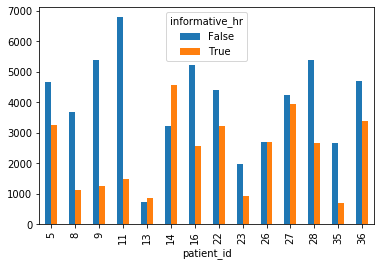

In [6]:
pd.crosstab(data_10['patient_id'],data_10['informative_hr']).plot.bar()

In [7]:
print_distribution_stats(data_10)

insgesamt: 88410, informativ: 36.92 %, nicht informativ: 63.08 %


In [8]:
print_informative_stats(data_10)

Informativ nach informative_ce:  18670
Nicht informativ nach informative_ce:  69740
Informativ nach informative_hr:  32638
Nicht informativ nach informative_hr:  55772
Informativ nach beiden:  10498
Informativ nur nach informative_hr:  22140


In [9]:
print_hr_stats(data_10)

Durchschnittliche Herzrate nach BKG:  67.76821039564663
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  66.9080163643243
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  66.92232979962007
Durchschnittliche absolute Abweichung bei informativen Segmenten:  3.1357579028240514
Durchschnittliche relative Abweichung bei informativen Segmenten:  4.6594275995365 %
Durchschnittliche Herzrate nach EKG (0 bei korrupter Referenz eingerechnet):  69.9443841194435


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94cfd9c588>,
      dtype=object)

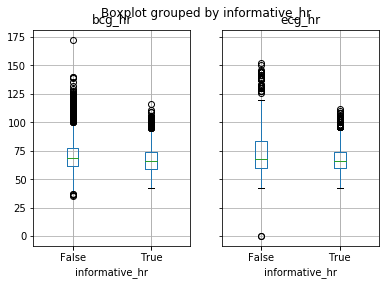

In [10]:
data_10.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative_hr')

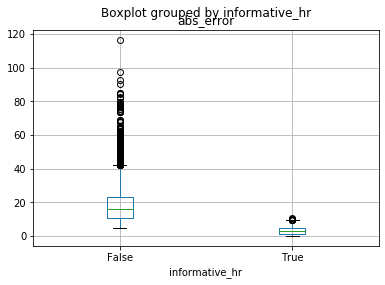

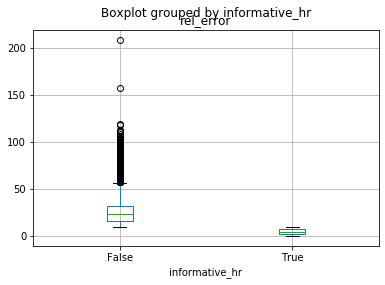

In [11]:
data_10.boxplot(column=['abs_error'],by='informative_hr')
data_10.boxplot(column=['rel_error'],by='informative_hr')

# Maximal 15% Abweichung der Herzfrequenz

In [12]:
data_15 = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=15)
data_15['abs_error'] = np.abs(data_15['bcg_hr']-data_15['ecg_hr'])
data_15['rel_error'] = 100/data_15['ecg_hr'] * data_15['abs_error']

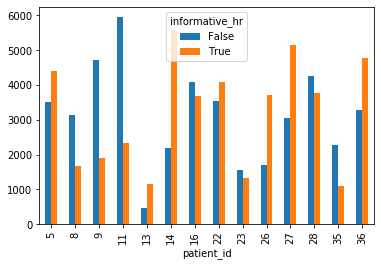

In [13]:
pd.crosstab(data_15['patient_id'],data_15['informative_hr']).plot.bar()

In [14]:
print_distribution_stats(data_15)

insgesamt: 88410, informativ: 50.53 %, nicht informativ: 49.47 %


In [15]:
print_informative_stats(data_15)

Informativ nach informative_ce:  18670
Nicht informativ nach informative_ce:  69740
Informativ nach informative_hr:  44677
Nicht informativ nach informative_hr:  43733
Informativ nach beiden:  12905
Informativ nur nach informative_hr:  31772


In [16]:
print_hr_stats(data_15)

Durchschnittliche Herzrate nach BKG:  67.76821039564663
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  67.41917293082604
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  67.5119860330819
Durchschnittliche absolute Abweichung bei informativen Segmenten:  4.6148610607983125
Durchschnittliche relative Abweichung bei informativen Segmenten:  6.763869678874732 %
Durchschnittliche Herzrate nach EKG (0 bei korrupter Referenz eingerechnet):  69.9443841194435


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94d068d6d8>,
      dtype=object)

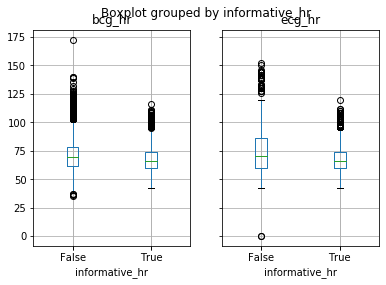

In [17]:
data_15.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative_hr')

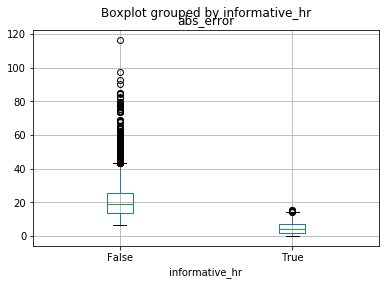

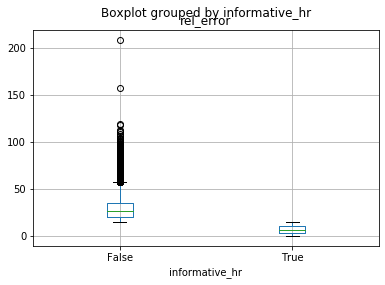

In [18]:

data_15.boxplot(column=['abs_error'],by='informative_hr')
data_15.boxplot(column=['rel_error'],by='informative_hr')

# Maximal 20% Abweichung der Herzfrequenz

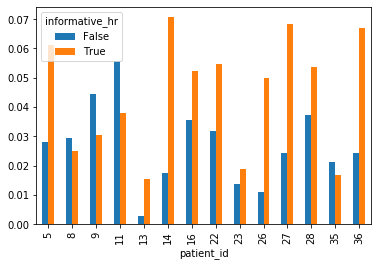

In [19]:
data_20 = load_data_as_dataframe(segment_length=10, overlap_amount=0, hr_threshold=20)
data_20['abs_error'] = np.abs(data_20['bcg_hr']-data_20['ecg_hr'])
data_20['rel_error'] = 100/data_20['ecg_hr'] * data_20['abs_error']
pd.crosstab(data_20['patient_id'],data_20['informative_hr'], normalize=True).plot.bar()

In [20]:
print_distribution_stats(data_20)

insgesamt: 88410, informativ: 62.27 %, nicht informativ: 37.73 %


In [21]:
print_informative_stats(data_20)

Informativ nach informative_ce:  18670
Nicht informativ nach informative_ce:  69740
Informativ nach informative_hr:  55050
Nicht informativ nach informative_hr:  33360
Informativ nach beiden:  14649
Informativ nur nach informative_hr:  40401


In [22]:
print_hr_stats(data_20)

Durchschnittliche Herzrate nach BKG:  67.76821039564663
Durchschnittliche Herzrate nach BKG bei informativen Segmenten:  67.78558775085449
Durchschnittliche Herzrate nach EKG bei informativen Segmenten:  68.14853769300636
Durchschnittliche absolute Abweichung bei informativen Segmenten:  6.085741396421103
Durchschnittliche relative Abweichung bei informativen Segmenten:  8.789103335777096 %
Durchschnittliche Herzrate nach EKG (0 bei korrupter Referenz eingerechnet):  69.9443841194435


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94b746e2e8>,
      dtype=object)

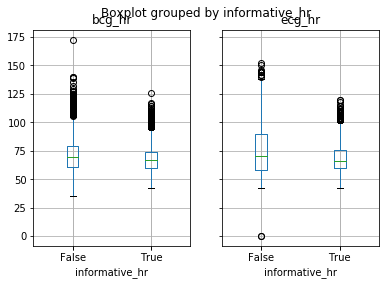

In [23]:
data_20.boxplot(column=['bcg_hr', 'ecg_hr'],by='informative_hr')

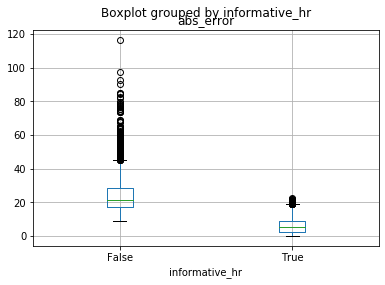

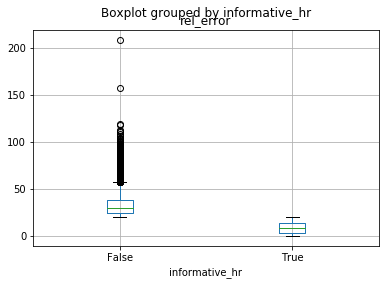

In [24]:

data_20.boxplot(column=['abs_error'],by='informative_hr')
data_20.boxplot(column=['rel_error'],by='informative_hr')